# Investigation: Hardware Identification via noise fingerprint exploration
The code to produce the circuits is given below. Thereafter the code to run the ideal circuits is given,then the code to run the circuits on hardware, then the code to extract and store the normalised noise profiles.

In [1]:
import qiskit
from qiskit import QuantumCircuit,  QuantumRegister, ClassicalRegister #Aer, IBMQ,

## Backends
We ibm_torino is Heron r1, ibm_kingston is Heron r2, ibm_pittsburgh is Heron r3.
Would be interesting to see 2 different hardware with same chip.
https://quantum.cloud.ibm.com/computers

In [2]:
backends = ['ibm_torino','ibm_brisbane']#,'ibm_kingston','ibm_pittsburgh']
#also I think these are the least busy

## Circuits
The circuits are a V shape. They are equivalent to Indentity operations.

![WhatsApp Image 2025-09-13 at 13.21.13_d16e4418.jpg](<attachment:WhatsApp Image 2025-09-13 at 13.21.13_d16e4418.jpg>)
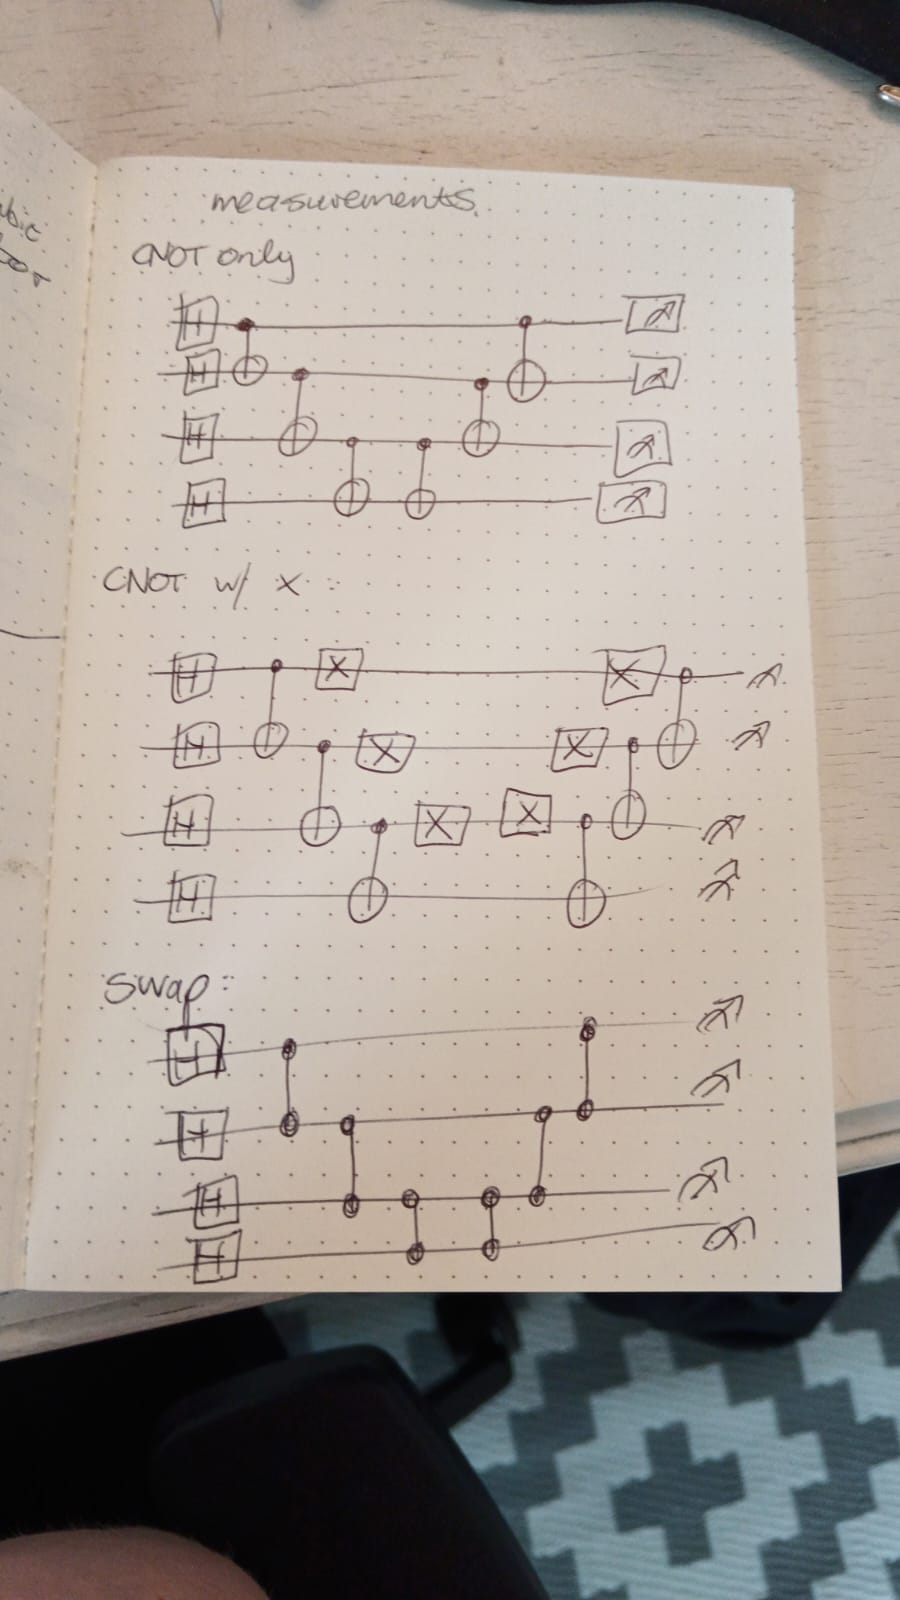

In [3]:
nrs_of_qubits = [4,8,16,32]
circuit_types = ['Cnot','Cnot_X','Swap'] #

In [ ]:
#for qubit_nr in nrs_of_qubits:
def make_set_of_3(nr_qubits):
    set_of_3 = []
    for i in range(len(circuit_types)):
        set_of_3.append(make_circuit(nr_qubits,circuit_types[i]))

    return set_of_3

def make_circuit(nr_qubits,circuit_type):
    # make circuit object
    qc = QuantumCircuit(nr_qubits)

    # apply hadamard gates to all qubits
    qc.h(range(nr_qubits))

    #left side of v
    qc = make_left_side(qc,nr_qubits,circuit_type)

    #right side of v
    qc = make_right_side(qc,nr_qubits,circuit_type)

    #apply measurement gates to all qubits
    qc.measure_all()

    return qc

def make_left_side(qc,nr_qubits,circuit_type):
    #right side of v
    for qubit in range(nr_qubits-1):
        match circuit_type:
            case 'Cnot':
                qc.cx(qubit,qubit+1)
            case 'Cnot_X':
                qc.cx(qubit,qubit+1)
                qc.x(qubit+1)
            case 'Swap':
                qc.swap(qubit,qubit+1)
    return qc

def make_right_side(qc,nr_qubits,circuit_type):
    #left side of v
    for qubit in range(nr_qubits-2,-1,-1): #start at nr_qubits-1, end at 0, step is -1
        match circuit_type:
            case 'Cnot':
                qc.cx(qubit,qubit+1)
            case 'Cnot_X':
                qc.x(qubit+1)
                qc.cx(qubit,qubit+1)
            case 'Swap':
                qc.swap(qubit,qubit+1)
    return qc

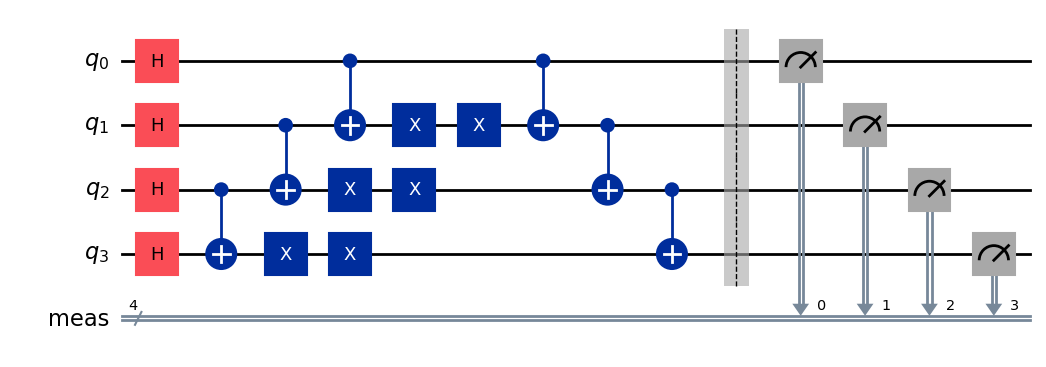

In [42]:
qc = make_circuit(4,'Cnot_X')
qc.draw('mpl')

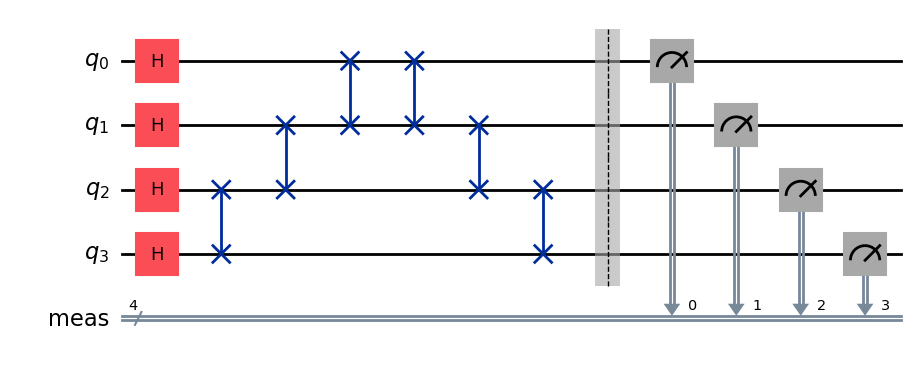

In [51]:
qc_set = make_set_of_3(4)
qc_set[2].draw('mpl')

## Simulated Ideal Results

## Sending Set to IBM backend

In [ ]:
#reference code ignore
#Using a sampler:
circuits = [make_circuit('C0',2), make_circuit('C0',3),make_circuit('C1',2),make_circuit('C1',3),make_circuit('B',2),make_circuit('B',3)]


service = QiskitRuntimeService()
backend = service.least_busy(
    operational=True, simulator=False, min_num_qubits=3
)

pm = generate_preset_pass_manager(optimization_level=1, backend=backend)
isa_circuits = pm.run(circuits)
 
sampler = Sampler(mode=backend)

#uncomment to run job
#job = sampler.run(isa_circuits)
#print(f">>> Job ID: {job.job_id()}")
#print(f">>> Job Status: {job.status()}")

#comment out when running the job anew
#Job ID: czwqhvq6rr3g008m9h0g
job = service.job('czwqhvq6rr3g008m9h0g')